# Departamento de Recursos Humanos

## Importação das bibliotecas e base de dados

- Base de dados: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df_rh = pd.read_csv('../../Data/Raw/rh/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [5]:
df_rh.shape

(1470, 35)

## Análise exploratória dos dados


In [6]:
df_rh.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Pontos importantes a verificar:

- Attrition representa se o funcionário está ou não em atrito com a empresa, o que aumentaria sua possibilidade de sair.
- Age também é importante porque funcionários mais jovens tendem a mudar mais de emprego do que funcionários com idades mais avançadas.
- Business Travel é a frequencia que o funcionário viaja a trabalho
- DailyRate é o salário diário do funcionário. Podemos usar os links mencionados acima para calulcuar o salário mensal.
- DistanceFromHome é a distância do trabalho em KMs.
- EnviromentSatisfaction é o nível de satisfação do funcionário com o ambiente de trabalho.
- NumCompaniesWorked é o numero de empresas que o funcionario trabalhou. Pode ser uma variável importante para prever a saída ou continuidade do empregado.
- StockOptionLevel indica se a empresa da a opção do funcionário comprar ou ganhar ações 

In [7]:
df_rh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
df_rh.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Verificamos com essas estatisticas básicas alguns pontos:

- A média de idade dos funcionários é de 39/40 anos sendo o funcionário mais velho tendo 60 anos.
- A distancia média é de 9.19km sendo que mais da metade dos funcionários estão abaixo de 7km de distancia do trabalho.
- A média do salário diário dos funcionários é quase equivalente a sua mediana, tendo uma grande diferença entre o menor e o maior salário.

## Visualização dos dados

Pra melhorar nossa construção de modelo, mudaremos os valores das colunas que possuem informações binários para 0 e 1. Como no exemplo da coluna Attrition, onde Yes mudará para 1 e No mudará para 0.

In [9]:
df_rh['Attrition'] = df_rh['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
df_rh['OverTime'] = df_rh['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
df_rh['Over18'] = df_rh['Over18'].apply(lambda x: 1 if x == 'Y' else 0)

In [10]:
df_rh.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Gerando um histograma da base de dados para verificarmos as distribuições de cada variável.

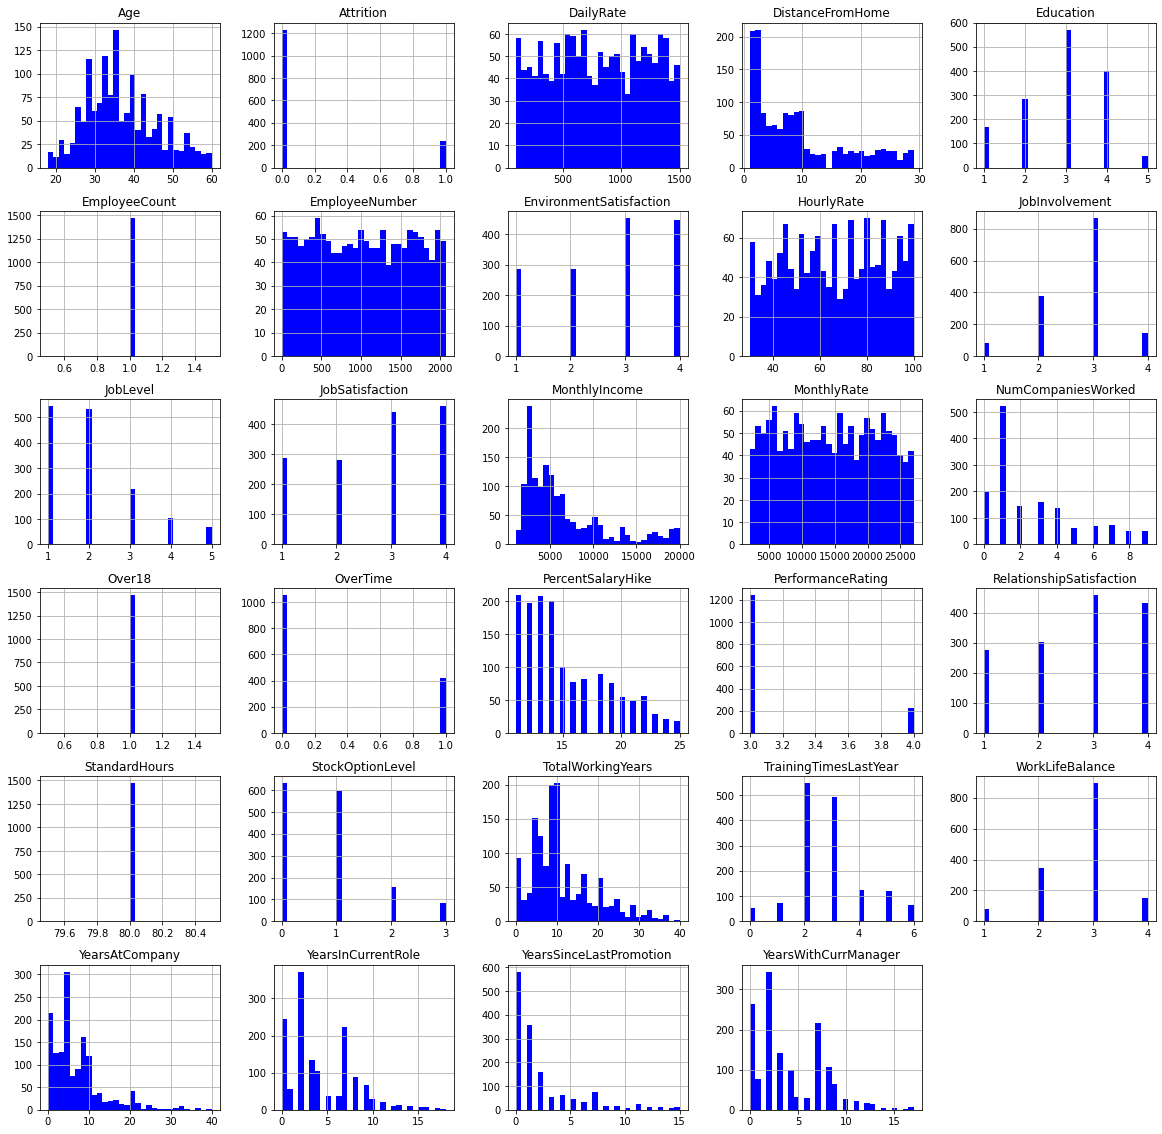

In [11]:
df_rh.hist(bins = 30, figsize=(20,20), color = 'b');

Com essa distribuição conseguimos ter uma ideia melhor da nossa base e de como ela está distribuida.

- A maior parte dos funcionários se concentram até os 40 anos. Essa visualização bate com as estatisticas de mediana e quartis, onde 75% dos dados estavam a idade 43.
- Temos uma concentração grande de funcionários que moram próximo ao trabalho.
- A maioria dos funcionários se concentram na faixa salarial mensal de até 5mil dolares.

Podemos verificar também existem colunas que não tem variações de valores, sendo um valor igual para toda base. Um exemplo disso é a variaável EmployeeCount, onde somente o número 1 aparece. Além dela, vemos também a StandardHours, Over18. 
A variável EmployeeNumber é o número de registro do usuário, uma chave primária de identificação.
Essas variáveis não servem muito para criação do nosso modelo portanto podemos retirar elas da nossa base de dados onde ficaremos com 31 colunas

In [12]:
df_rh.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis = 1, inplace=True)

In [13]:
df_rh.shape

(1470, 31)

Vamos dividir agora nossa base em duas, sendo uma as pessoas que sairam da empresa e outra as que ficaram

In [14]:
df_sairam = df_rh[df_rh['Attrition'] == 1]
df_ficaram = df_rh[df_rh['Attrition'] == 0]

In [15]:
print('Total de funcionários que a empresa já teve = ', len(df_rh))
print('Número de funcionários que saíram da empresa = ', len(df_sairam))
print('Porcentagem de funcionários que saíram da empresa = ', (len(df_sairam) / len(df_rh)) * 100)
print('Número de funcionários que ficaram na empresa = ', len(df_ficaram))
print('Porcentagem de funcionários que ficaram na empresa = ', (len(df_ficaram) / len(df_rh)) * 100)

Total de funcionários que a empresa já teve =  1470
Número de funcionários que saíram da empresa =  237
Porcentagem de funcionários que saíram da empresa =  16.122448979591837
Número de funcionários que ficaram na empresa =  1233
Porcentagem de funcionários que ficaram na empresa =  83.87755102040816


Verificando as estatisticas das pessoas que sairam e das pessoas que sairam

In [16]:
df_sairam.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [17]:
df_ficaram.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


Podems ter algumas ideias de acordo com as estatisticas:

- A media de idade das pessoas que saem é menor que as que ficam. Um indicativo que pessoas mais novas tendem a mudar mais de empregos que pessoas mais velhas.
- A Faixa salarial das pessoas que deixam a empresa também é menos que as que ficam. Pode indicar que um dos motivos é procura por um emprego que pague melhor.
- Outro fator importante a verificar que é distancia media das que sairam e que ficaram não varia muito, mas podemos deduzir que a partir de 7km as pessoas tendem a sair mais do que ficar.

Podemos verificar as correlações entre as variáveis agora:


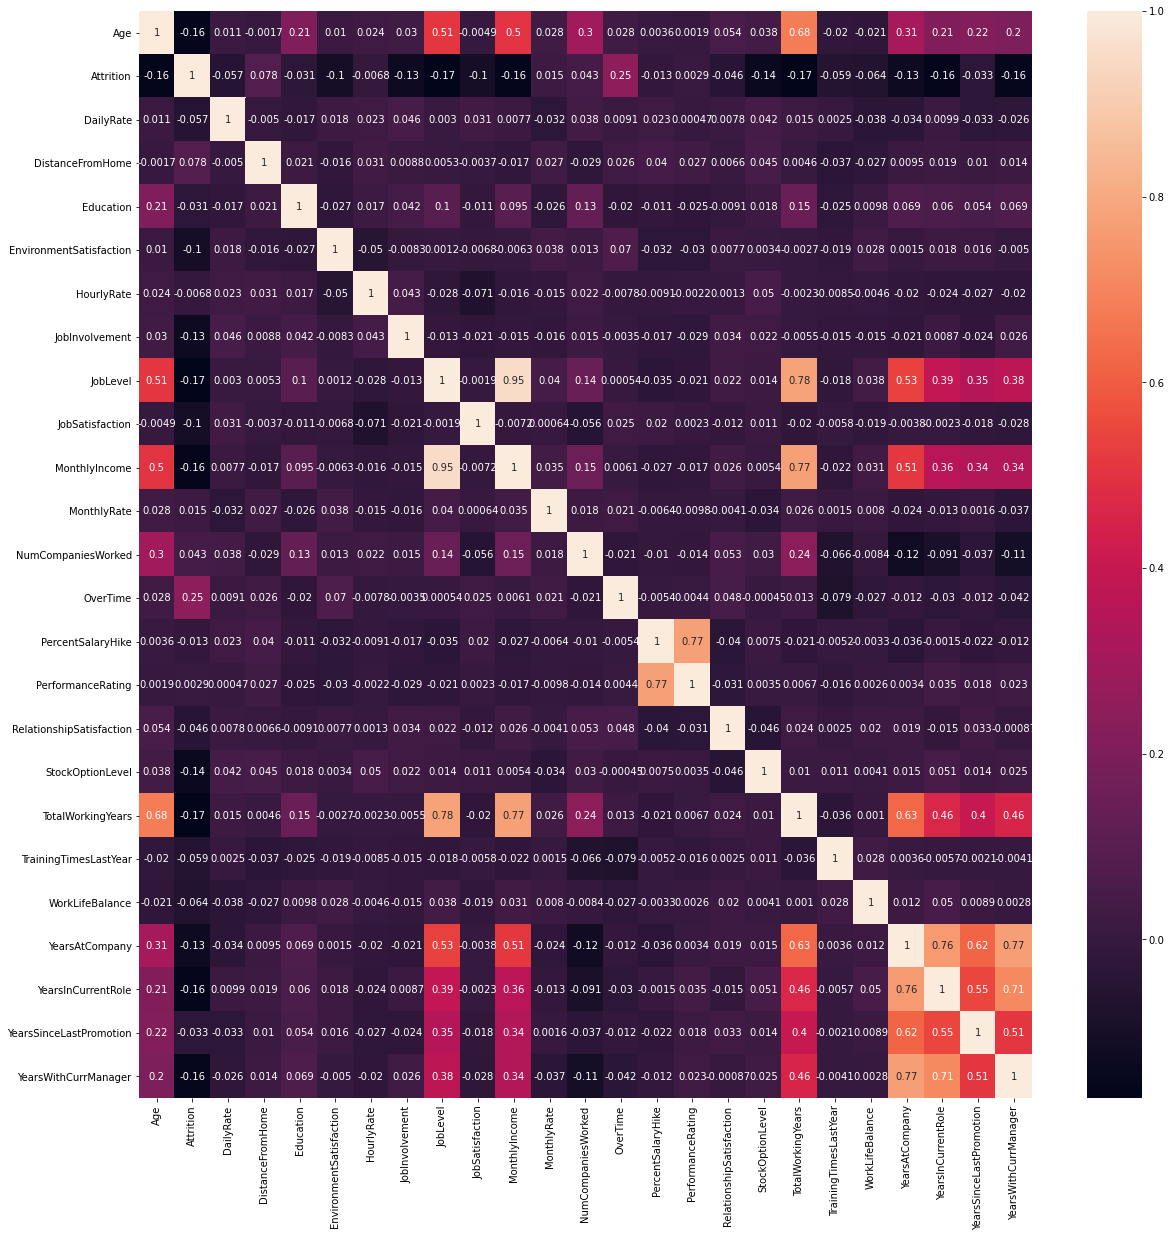

In [18]:
correlations = df_rh.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot=True);

- Existe uma forte correlação positiva entre JobLevel e TotalWorkingYears, indicando que quanto mais tempo a pessoa está trabalhando na empresa maior é o nível do cargo. É possível também verificar essa correlação entre MonthlyIncome e TotalWorkingYears. Quando mais tempo na empresa, maior é o salário.
- A maior correlação positiva encontrada foi de 0.95 entre JobLevel e MonthlyIncome. Ou seja, é possivel confirmar que quanto maior o nível do cargo, maior será o seu salário.
- Também é possível verificar a correlação positiva entre PerformanceRating e PercentSalaryHide, o que indica que a empresa adota uma politica de aumento de salário maior por performance do funcionário.
- Não foi possível verificar nenhuma correlação forte para Attrition, nesse caso não existe nenhuma variável que seja decisiva para o funcionário deixar a empresa.

Podemos verificar a distribuição etária das pessoas que sairam e as que ficaram na empresa para termos uma noção mais espacial e melhorar o entendimento

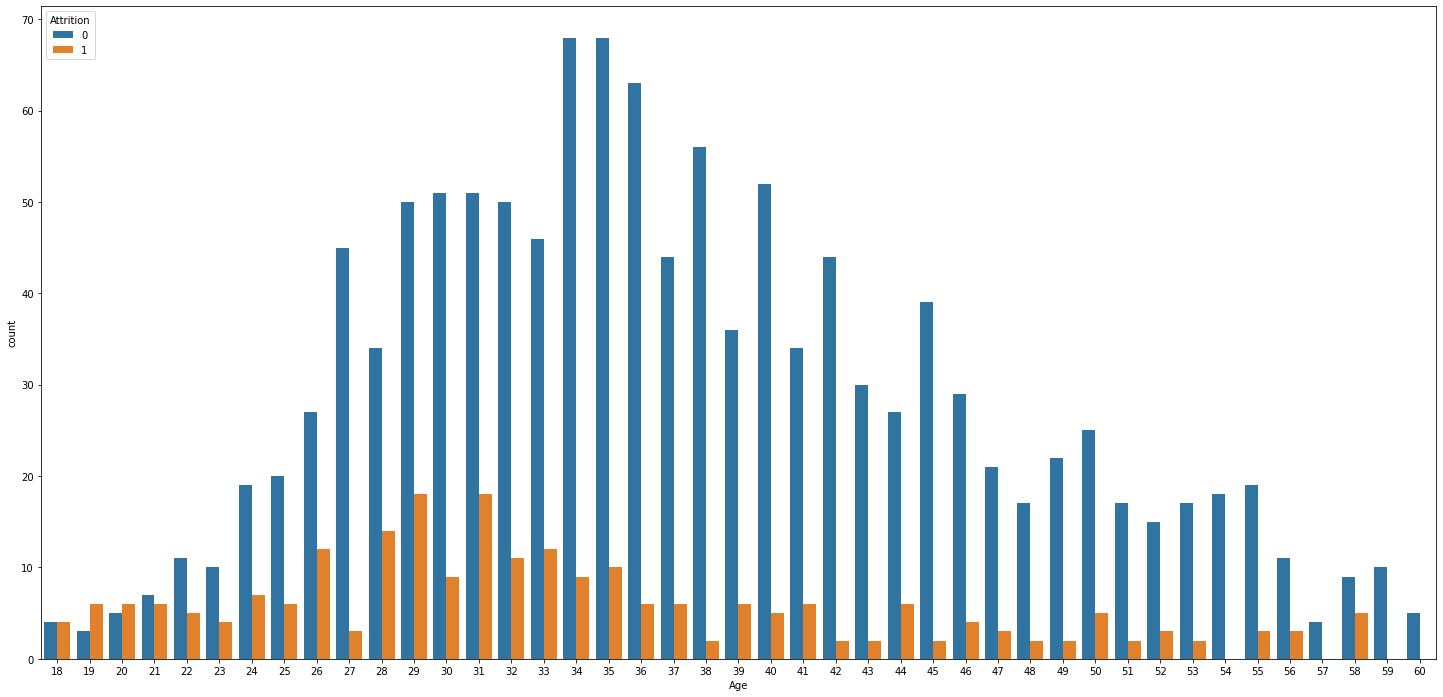

In [19]:
plt.figure(figsize=[25,12])
sns.countplot(x = 'Age', hue = 'Attrition', data=df_rh);

Nessa visualização é possível verificar que até os 21 anos, os números são bem distribuidos entre os que ficam e os que saem, corroborando com a nossa ideia inicial que pessoas mais novas tendem a mudar de trabalho mais facilmente. 
A partir dos 34, podemos ver que existe uma grande aumento das pesosas que ficam na empresa, geralmente uma faixa etária onde precisam de mais estabilidade para familia, filhos entre outras coisas.

Podemos fazer esse relacionamento também com outras variáveis:

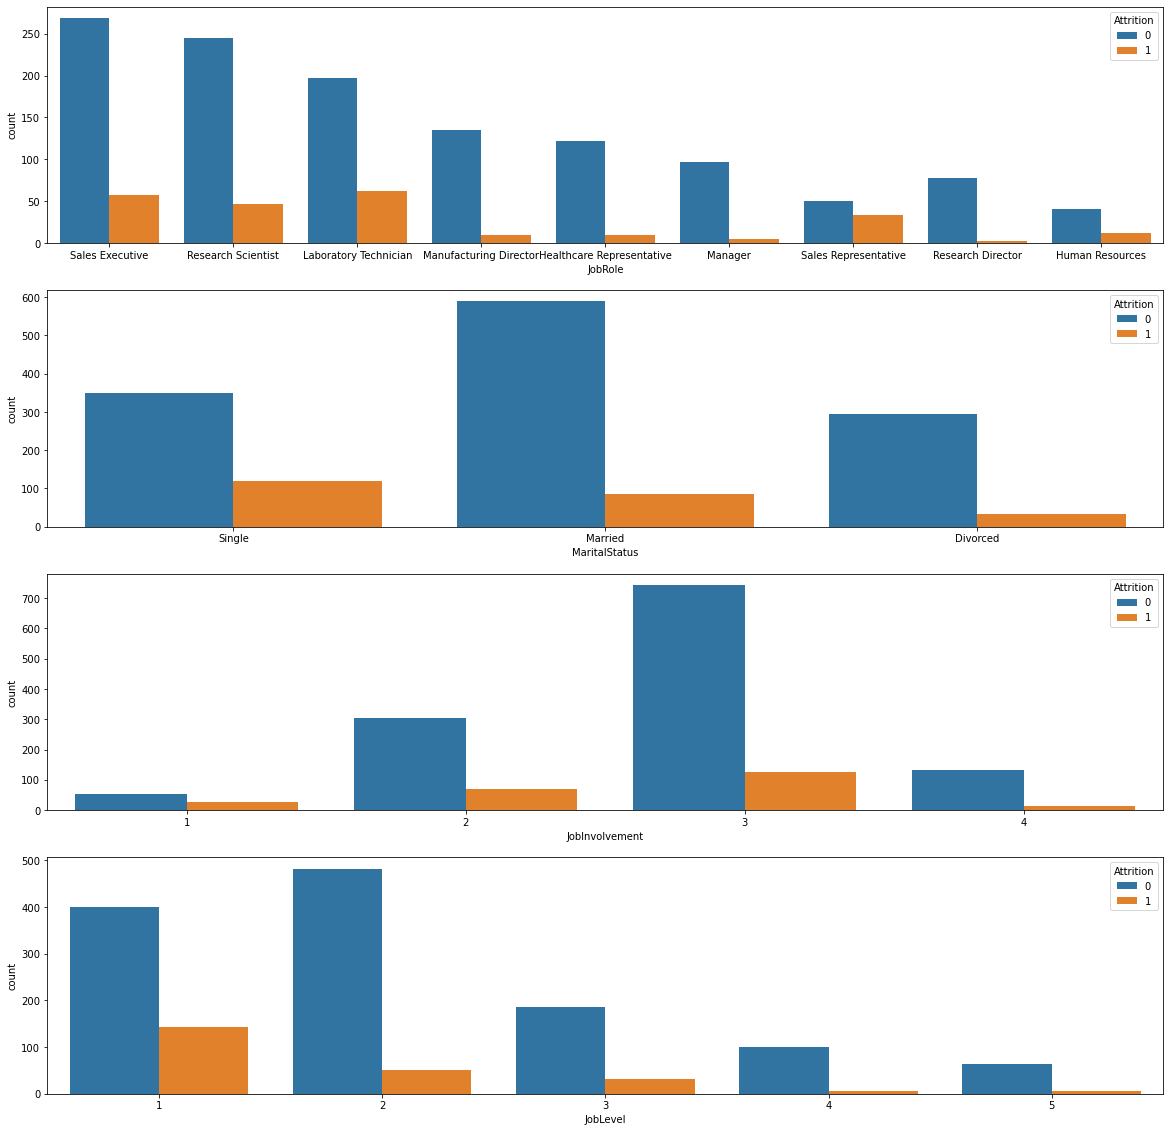

In [20]:
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = df_rh)
plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = df_rh)
plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = df_rh)
plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = df_rh);

- Podemos ver que as pessoas que tendem a sair mais trabalham como Representante de vendas. Os executivos de vendas e Tecnicos de laboratorios também tiveram muitas saídas porém com uma diferença menor. Podemos pensar que pela concorrência do mercado, essas são profissões mais quentes e com mais tendência de troca de empresa. 
- Também podemos ver que as pessoas casadas tendem a ficar muito mais que as pessoas solteiras. Entre as divorcidadas, pouquissimas saem. 
- Quando menor o JobLevel, maior a tendência do funcionário deixar a empresa.
- Apesar das pessoas com nível 3 de JobInvolviment sairem mais em quantidade, proporcionalmente, as do nível tipo 1, sairam mais, sendo praticamente metade delas.

Agora podemos ver a densidade das pessoas que sairam ou ficaram de acordo com a distância das suas casas para o trabalho.

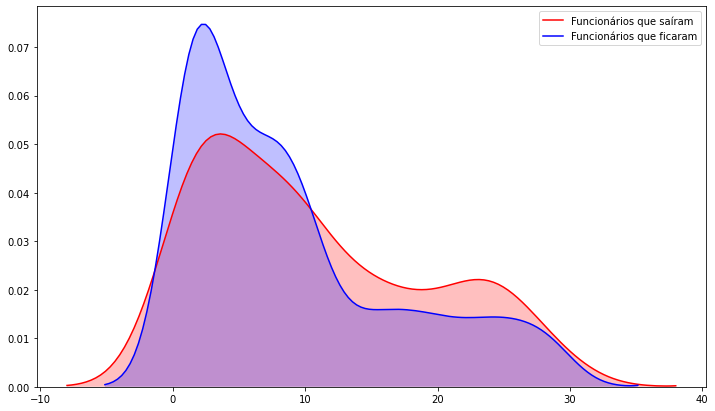

In [21]:
plt.figure(figsize=(12,7))
sns.kdeplot(df_sairam['DistanceFromHome'], label = 'Funcionários que saíram', shade = True, color = 'r')
sns.kdeplot(df_ficaram['DistanceFromHome'], label = 'Funcionários que ficaram', shade = True, color = 'b');

- As pessoas que moram mais próximo tem a tendencia de ficar mais na empresa do que as que moram mais longe. 

Podemos também verificar os salários por genero e tentar identificar sem tem alguma conexão entre eles.

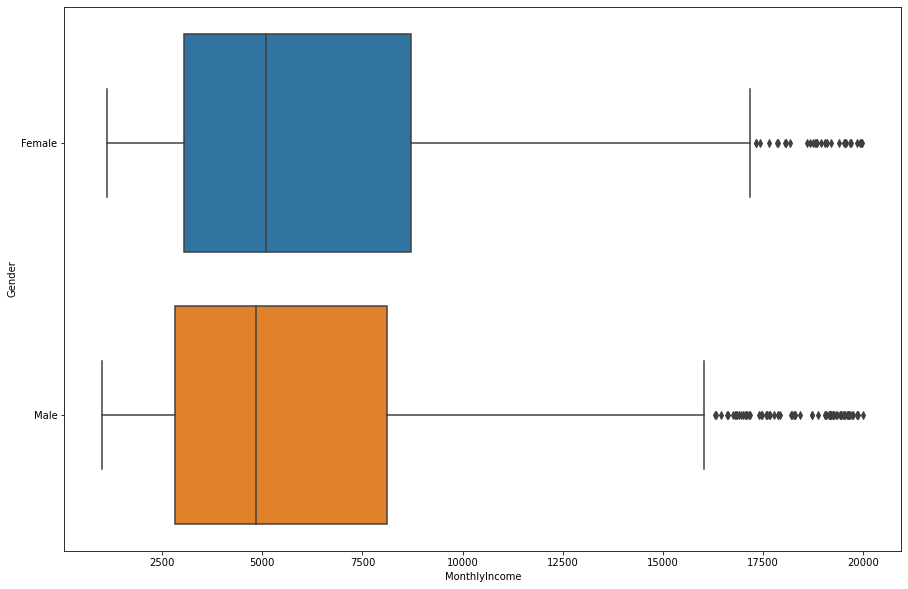

In [27]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'Gender', data=df_rh);

É possível verificar que nessa base de dados, a média de salário das mulheres é maior do que a dos homens.
Também podemos fazer uma análise de salário para cada profissão.

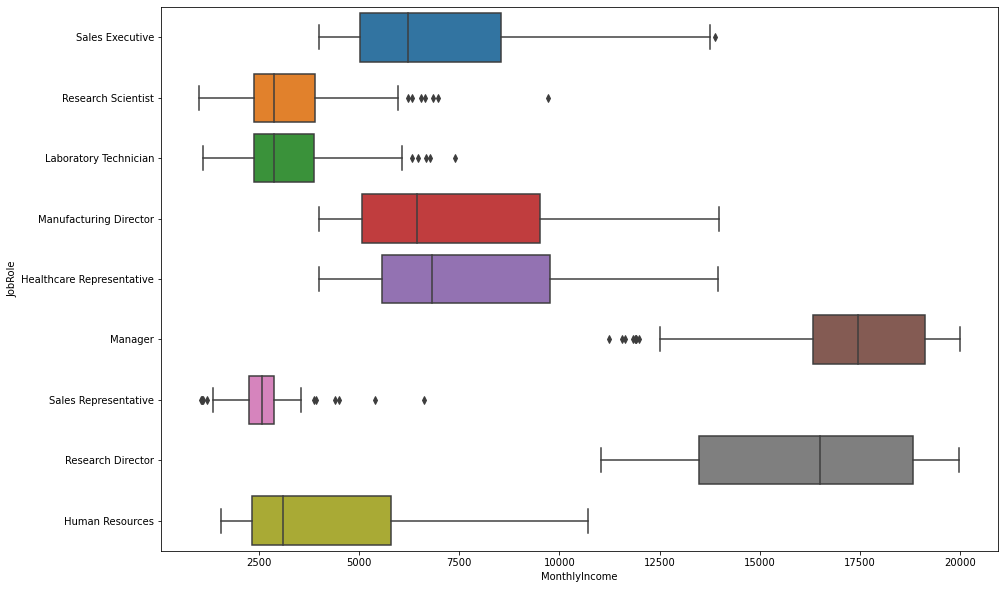

In [28]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data=df_rh);

Verificamos anteriormente que os Representantes de vendas tinham uma tendência maior de deixar a empresa. Nessa visualização, podemos ver que o salário pode ser uma indicação disso, pois é o cargo que recebe menos.

## Pré-processamento e bases de treinamento/teste

In [29]:
df_rh.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


Vamos separar os dados categóricos em um dataframe em separado para criar as dummy values para adequar a criação do nosso modelo.
Como os atributos das nossas variáveis não tem um peso maior em relação ao outro, por exempo, um genero Male não tem mais peso que o Female. Uma pessoa casada não tem mais peso que uma divorcida, etc.
Para isso, podemos usar o OneHotEncoder que separa nossa base de forma o modelo não levar a importância ao número e sim ao atributo

In [30]:
X_cat = df_rh[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
X_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [31]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [32]:
X_cat.shape

(1470, 26)

In [33]:
type(X_cat)

numpy.ndarray

In [34]:
X_cat[0]

array([0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1.])

Feito isso, foi criado um array com os valores 0 e 1, onde 0 é que o atrbuto é falso e 1 é verdadeiro, retirando assim qualquer peso. Podemos transformar em um dataframe novamente.

In [35]:
X_cat = pd.DataFrame(X_cat)
type(X_cat)

pandas.core.frame.DataFrame

Pra melhor entendimento, o dataframe separou os atributos categoricos em colunas. Sendo assim, a primeira coluna BusinessTravel, se transformou em 3 colunas com seus atributos 'Travel_Rarely', 'Travel_Frequently', 'Non-Travel'. 
Portanto quando um funcionário raramente viaja pela empresa, ele terá o valor de 1 na coluna "Travel_Rarely", conforme podemos compararmos o dataframe criado com o original.

In [36]:
sorted(df_rh['BusinessTravel'].unique())

['Non-Travel', 'Travel_Frequently', 'Travel_Rarely']

In [37]:
X_cat.head(1)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [38]:
df_rh.head(1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5


Com isso podemos confirmar que a coluna 2 se refere ao 'Travel_Rarely' preenchido com o valor 1 e as outras colunas com 0. A lógica segue para as demais colunas. 
Vamos continuar agora para o dataframe somente com as colunas númericas em seguida concatenar com as categorias já encodadas.

In [39]:
X_numerical = df_rh[['Age', 'DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]
X_numerical

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


In [40]:
X_all = pd.concat([X_cat, X_numerical], axis = 1)
X_all

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,3,1,17,3,3,5,2,0,3
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,1,1,9,5,3,7,7,1,7
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,2,1,6,0,3,6,2,0,3
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,3,4,0,17,3,2,9,6,0,8


Como temos uma base com valores desnormalizados, precisamos transformar os dados para que o nosso modelo consiga perceber corretamente os valores no momento do treinamento, para isso podemos usar o MinMaxScaler, onde normalizaremos os valores em X e pegaremos nossa variável alvo do dataframe original na variável y

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)

In [42]:
X # atributos previsores

array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

In [43]:
y = df_rh['Attrition']
y # variável alvo

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

Por fim, dividiremos nossa base em treino e teste para começar a aplicar os modelos.

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [110]:
X_train.shape, y_train

((1102, 50),
 430     0
 981     1
 1363    0
 730     0
 355     0
        ..
 788     0
 88      0
 1153    1
 621     0
 153     0
 Name: Attrition, Length: 1102, dtype: int64)

In [111]:
X_test.shape, y_test

((368, 50),
 456     0
 307     0
 1392    0
 516     0
 936     0
        ..
 1414    0
 116     0
 997     1
 568     1
 321     0
 Name: Attrition, Length: 368, dtype: int64)

## Regressão logística

In [112]:
from sklearn.linear_model import LogisticRegression

In [113]:
logReg = LogisticRegression()
logReg.fit(X_train, y_train)

LogisticRegression()

In [114]:
y_pred = logReg.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [115]:
y_test

456     0
307     0
1392    0
516     0
936     0
       ..
1414    0
116     0
997     1
568     1
321     0
Name: Attrition, Length: 368, dtype: int64

In [116]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [117]:
accuracy_score(y_test, y_pred)

0.8777173913043478

Com a regressão logística conseguimos uma acurácia de 89% do nosso modelo. 
Precisamos calcular as outras métricas para verificar a precisão e recall.

In [118]:
from sklearn.metrics import confusion_matrix

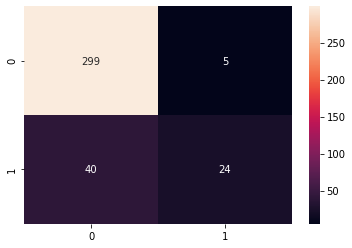

In [119]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g');

Visualizando a matriz de confusão, podemos ver que o algoritmo praticamente não erra para a classe zero, que são os funcionários que ficaram na empresa. POrém nosso objetivo é saber os que ficaram, e nessa avaliação o algoritmo tende a errar mais.

In [120]:
precision_score(y_test, y_pred)

0.8275862068965517

In [121]:
recall_score(y_test, y_pred)

0.375

In [122]:
f1_score(y_test, y_pred)

0.5161290322580646

In [123]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       304
           1       0.83      0.38      0.52        64

    accuracy                           0.88       368
   macro avg       0.85      0.68      0.72       368
weighted avg       0.87      0.88      0.86       368



Podemos ver pelo recall que o modelo identifica corretamente menos de 50% das pessoas que vão de fato sair da empresa. Um valor bem baixo de acerto para o nosso problema.
Concluímos que o modelo acerta muito para a classe 0 mas tem uma eficiência ruim de acertos para a classe 1. 
Vamos ver se com o modelo Random Forest temos um resultado melhor.


## Random forest

In [124]:
from sklearn.ensemble import RandomForestClassifier

In [125]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [126]:
y_pred = forest.predict(X_test)

In [127]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [128]:
accuracy_score(y_test, y_pred)

0.8478260869565217

In [129]:
cm = confusion_matrix(y_pred, y_test)
cm

array([[302,  54],
       [  2,  10]], dtype=int64)

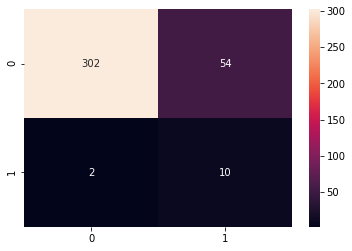

In [130]:
sns.heatmap(cm, annot=True, fmt='g');

In [131]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       304
           1       0.83      0.16      0.26        64

    accuracy                           0.85       368
   macro avg       0.84      0.57      0.59       368
weighted avg       0.85      0.85      0.80       368



Nosso resultado piorou em comparação a regressão logística. Vamos verificar com o algoritmo de redes neurais.

## Redes neurais artificiais


In [132]:
import tensorflow as tf

In [133]:
X_train.shape

(1102, 50)

As redes neurais possuem o número P de parametros de entrada que no nosso caso aqui são os atributos da nossa base e temos as camadas escondidas.
Podemos usar uma formula pra saber a densidade de neurônios a serem usados nas camadas que é pegar o número dos atributos da base (50) + o número de saídas (nosso caso será 1 ou 0, então teremos somente uma saída) divididos por 2.
portanto:


In [134]:
(50 + 1) / 2

25.5

Aplicamos as unidades conforme a divisão obtida, usando a função de ativação relu em 2 camadas com um input_shape de 50, que é o número dos nossos atributos, e uma camada de saída com função de ativação sigmoid (que gera valores entre 0 e 1).

In [135]:
rede_neural = tf.keras.models.Sequential()
rede_neural.add(tf.keras.layers.Dense(units = 25, activation='relu', input_shape=(50,)))
rede_neural.add(tf.keras.layers.Dense(units = 25, activation = 'relu'))
rede_neural.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [136]:
rede_neural.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_12 (Dense)             (None, 25)                650       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 26        
Total params: 1,951
Trainable params: 1,951
Non-trainable params: 0
_________________________________________________________________


Agora compilando a rede neural com o otimizador Adam e a perda binária pra classificadores entre 0 e 1 , e a métrica que eu quero alcaçar é a acurácia.

In [137]:
rede_neural.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [138]:
rede_neural.fit(X_train, y_train, epochs=200)

Epoch 1/200
35/35 [==============================] - 0s 733us/step - loss: 0.6609 - accuracy: 0.5831
Epoch 2/200
35/35 [==============================] - 0s 821us/step - loss: 0.4315 - accuracy: 0.8592
Epoch 3/200
35/35 [==============================] - 0s 911us/step - loss: 0.4343 - accuracy: 0.8297
Epoch 4/200
35/35 [==============================] - 0s 909us/step - loss: 0.4026 - accuracy: 0.8486
Epoch 5/200
35/35 [==============================] - 0s 880us/step - loss: 0.4124 - accuracy: 0.8300
Epoch 6/200
35/35 [==============================] - 0s 852us/step - loss: 0.3811 - accuracy: 0.8436
Epoch 7/200
35/35 [==============================] - 0s 939us/step - loss: 0.3555 - accuracy: 0.8468
Epoch 8/200
35/35 [==============================] - 0s 763us/step - loss: 0.3484 - accuracy: 0.8582
Epoch 9/200
35/35 [==============================] - 0s 849us/step - loss: 0.3165 - accuracy: 0.8857
Epoch 10/200
35/35 [==============================] - 0s 792us/step - loss: 0.3275 - accura

In [139]:
y_pred = rede_neural.predict(X_test)
y_pred

array([[4.85718250e-04],
       [3.86076977e-07],
       [1.26682698e-05],
       [3.42065096e-03],
       [1.57812238e-03],
       [4.42807068e-05],
       [1.69102848e-02],
       [4.01049852e-04],
       [5.69547474e-01],
       [9.97625828e-01],
       [2.78204679e-04],
       [2.99697986e-05],
       [1.21582478e-01],
       [8.58244552e-12],
       [1.09027806e-05],
       [6.44410703e-09],
       [3.76164317e-02],
       [1.79160595e-01],
       [1.90883875e-04],
       [8.57353210e-04],
       [2.91853127e-07],
       [1.85277358e-08],
       [2.46882439e-04],
       [1.00000000e+00],
       [3.10917898e-07],
       [2.29439763e-07],
       [2.82374032e-07],
       [1.80387497e-02],
       [3.33550133e-06],
       [1.84366087e-08],
       [3.22781574e-07],
       [2.13414431e-04],
       [1.57487266e-05],
       [4.92926029e-06],
       [1.68323517e-04],
       [4.13597809e-05],
       [1.08083189e-02],
       [2.97525542e-08],
       [6.15641475e-03],
       [9.81907942e-06],


Nesse caso, precisamos aplicar uma codificação para transformar os números nas classes.

In [140]:
y_pred = (y_pred >= 0.5)
y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [

Podemos agora criar nossa matrix de confusão:

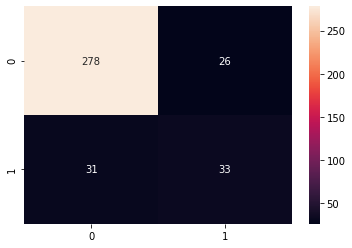

In [141]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g');

In [142]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       304
           1       0.56      0.52      0.54        64

    accuracy                           0.85       368
   macro avg       0.73      0.72      0.72       368
weighted avg       0.84      0.85      0.84       368



Podemos ver que a precisão do modelo caiu porém a taxa de recall subiu consideravelmente. Nesse caso, cabe saber o quanto queremos perder em precisão e ganhar em recall. 
Por fim, vamos salvar o modelo para classificar novos funcionários que entrarem na nossa base.

Preferi optar pelo modelo de regressão logistica que me deu mais precisão e é um modelo que consome menos recursos, apesar de um recall menor, o número não foi tão diferente assim das redes neurais e random forest

## Salvar o classificador

In [144]:
import pickle

In [145]:
with open('variaveis_modelo.pkl', 'wb') as f:
  pickle.dump([scaler, onehotencoder, logReg], f)

In [146]:
with open('variaveis_modelo.pkl', 'rb') as f:
  min_max, encoder, model = pickle.load(f)

In [ ]:
min_max, encoder, model

(MinMaxScaler(copy=True, feature_range=(0, 1)),
 OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
               handle_unknown='error', sparse=True),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False))

In [ ]:
X_novo = employee_df.iloc[0:1]
X_novo

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5


In [ ]:
X_cat_novo = X_novo[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
X_cat_novo

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single


In [ ]:
X_cat_novo = encoder.transform(X_cat_novo).toarray()

In [ ]:
X_cat_novo

array([[0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 1.]])

In [ ]:
X_cat_novo = pd.DataFrame(X_cat_novo)
X_cat_novo

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
X_numerical_novo = X_novo[['Age', 'DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]
X_numerical_novo

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5


In [ ]:
X_all_novo = pd.concat([X_cat_novo, X_numerical_novo], axis = 1)
X_all_novo

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5


In [ ]:
X_novo = min_max.transform(X_all_novo)
X_novo

array([[0.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 0.54761905, 0.71581961, 0.        , 0.25      ,
        0.33333333, 0.91428571, 0.66666667, 0.25      , 1.        ,
        0.26245392, 0.6980526 , 0.88888889, 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.2       , 0.        ,
        0.        , 0.15      , 0.22222222, 0.        , 0.29411765]])

In [ ]:
model.predict(X_novo)

array([1])

In [ ]:
model.predict_proba(X_novo)

array([[0.41422661, 0.58577339]])

In [ ]:
model.classes_

array([0, 1])